# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from rentcast_api import *

%load_ext autoreload
%autoreload 2

In [ ]:
test = RentCastPlotter.open_db(db_path='./Data/All', city='Littleton', state='CO')

# Grab Data - Lots of Listings per City

In [ ]:
# Using Rentcast API

city = 'Redwood City'
city = 'Atherton'
city = 'Portland'
offsets = np.arange(0, 10, 1)
df_all = None

for offset in offsets:

    # This is the max limit per query
    # Offsets allow for grabbing more data, but will count as an additional query
    limit = 500  

    # Design query
    url = 'https://api.rentcast.io/v1/properties'
    querystring = {'city': city, 'state': 'OR', 'limit': limit, 'offset': offset * limit}
    headers = {'accept': 'application/json', 'X-Api-Key': rent_cast_api_key}

    # Get query
    response = requests.get(url, headers=headers, params=querystring)
    listings = response.json()



    # Loop through results and create dataframe
    for listing_loop in listings:

        listing = copy.deepcopy(listing_loop)
        listing_temp = copy.deepcopy(listing)

        headers = ['id', 'addressLine1', 'addressLine2', 'city', 'state', 
                   'zipCode', 'county', 'latitude', 'longitude', 'squareFootage', 
                   'lotSize', 'yearBuilt', 'lastSaleDate', 'lastSalePrice', 
                   'bedrooms', 'bathrooms', 'propertyType']

        for header in listing_temp:
            if header not in headers:
                del listing[header]
            else:
                listing[header] = [listing[header]]

        df_temp = pd.DataFrame.from_dict(listing)
        df_all = pd.concat([df_all, df_temp], ignore_index=True)

# Save to CSV file

In [ ]:
city = 'Redwood City'
filename_city = city.replace(' ', '_').lower()
df_all.to_csv('%s.csv' % filename_city)

# Simple Plots

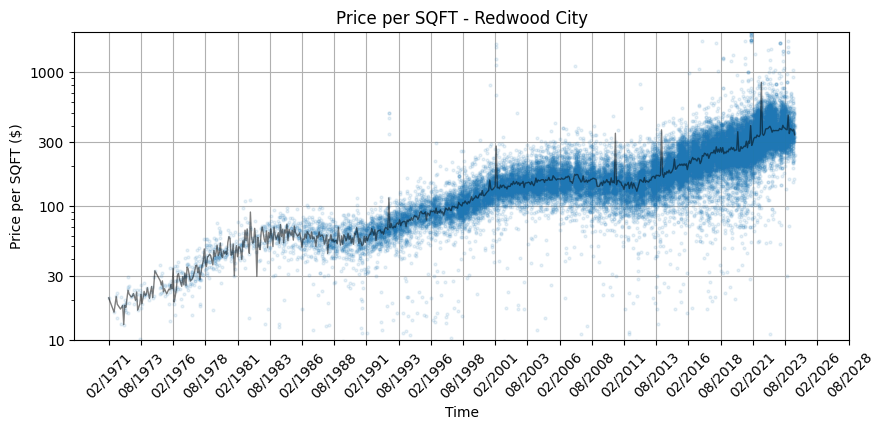

In [8]:
df = test.parse_sale_date2(test.data_processed)

check1 = df['squareFootage'] > 1000
check2 = df['squareFootage'] < 3000
df_temp  = df[check1 & check2]
# df_temp = df

x = df_temp['months'].values / 12
y = df_temp['price_per_sqft'].values

# Avererages    
grouped_df = df_temp.groupby('months')['price_per_sqft'].mean().reset_index()
x_avg = grouped_df['months'].values / 12
y_avg = grouped_df['price_per_sqft'].values

# y_average = df.average
plt.figure(figsize=(10, 4))

# plt.plot(x, y, lw=0, ms=2, marker='o', alpha=0.2)
# plt.plot(x_avg, y_avg, lw=1, ms=0, marker='o', color='black', alpha=0.5)
# plt.ylim([-10, 2000])

plt.semilogy(x, y, lw=0, ms=2, marker='o', alpha=0.1)
plt.semilogy(x_avg, y_avg, lw=1, ms=0, marker='o', color='black', alpha=0.5)
plt.ylim([50, 2000])


# plt.xlim([40, 60])

# x labels
int_labels = np.arange(0, 60, 2.5)
n = len(int_labels)
lsd = df['lastSaleDate'].values[0]
dt = datetime.datetime.strptime(lsd, '%Y-%m-%dT%H:%M:%S.%fZ')
dt_labels = [test.add_months(dt, x * 30) for x in range(n)]
dt_labels = [dt_label.strftime('%m/%Y') for dt_label in dt_labels]
plt.xticks(int_labels, dt_labels, rotation=45)
plt.yticks([10, 30, 100, 300, 1000], [10, 30, 100, 300, 1000])

plt.title('Price per SQFT - Redwood City')
plt.ylabel('Price per SQFT ($)')
plt.xlabel('Time')
plt.grid(True)
# plt.xlim([40, 55])

In [19]:
test = RentCastData.open_db(db_path='./Data/CA', city='Redwood City', state='CA')

redwood_cityca


In [25]:
db_path = './Data/CA.db'
city = 'Redwood City'
state = 'CA'

conn = sqlite3.connect(db_path)

cursor = conn.cursor()

# query for tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print([t[0] for t in tables])  # list of table names

table_name = city + state
table_name = table_name.replace(' ', '_')
table_name = table_name.lower()
df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
df

['Redwood City', 'redwood_cityca']


,id,addressLine1,addressLine2,city,state,zipCode,county,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSalePrice,Offset,limit,Querystring
0,"1155-Cedarwood-Way,-Redwood-City,-CA-94061",1155 Cedarwood Way,None,Redwood City,CA,94061,San Mateo,37.458495,-122.223234,Single Family,3.0,2.0,1860.0,6391.0,1950.0,2014-06-13T00:00:00.000Z,992500.0,0,500,"{'city': 'Redwood City', 'state': 'CA', 'limit..."
1,"2580-El-Camino-Real,-Redwood-City,-CA-94061",2580 El Camino Real,None,Redwood City,CA,94061,San Mateo,37.472102,-122.217256,Apartment,2.0,2.0,NaN,NaN,2014.0,2015-03-31T00:00:00.000Z,84000000.0,0,500,"{'city': 'Redwood City', 'state': 'CA', 'limit..."
2,"885-Woodside-Rd,-Redwood-City,-CA-94061",885 Woodside Rd,None,Redwood City,CA,94061,San Mateo,37.464697,-122.224018,Apartment,NaN,NaN,NaN,NaN,2010.0,2016-01-15T00:00:00.000Z,29500000.0,0,500,"{'city': 'Redwood City', 'state': 'CA', 'limit..."
3,"1660-Gordon-St,-Redwood-City,-CA-94061",1660 Gordon St,None,Redwood City,CA,94061,San Mateo County,37.466317,-122.224885,Apartment,1.0,1.0,NaN,NaN,1963.0,None,NaN,0,500,"{'city': 'Redwood City', 'state': 'CA', 'limit..."
4,"707-Leahy-St,-Redwood-City,-CA-94061",707 Leahy St,None,Redwood City,CA,94061,San Mateo,37.470217,-122.215231,Apartment,1.0,1.0,638.0,NaN,1973.0,2007-04-03T00:00:00.000Z,23000000.0,0,500,"{'city': 'Redwood City', 'state': 'CA', 'limit..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31723,"817-Sovereign-Way,-Redwood-City,-CA-94065",817 Sovereign Way,None,Redwood City,CA,94065,San Mateo,37.536867,-122.237830,Condo,3.0,3.0,1800.0,1295.0,1989.0,2003-08-29T00:00:00.000Z,697500.0,31500,500,"{'city': 'Redwood City', 'state': 'CA', 'limit..."
31724,"84-Waterside-Cir,-Redwood-City,-CA-94065",84 Waterside Cir,None,Redwood City,CA,94065,San Mateo,37.534333,-122.237411,Single Family,4.0,3.0,2550.0,4185.0,1988.0,2005-06-09T00:00:00.000Z,1175000.0,31500,500,"{'city': 'Redwood City', 'state': 'CA', 'limit..."
31725,"201-Pickleweed-Ln,-Redwood-City,-CA-94065",201 Pickleweed Ln,None,Redwood City,CA,94065,San Mateo,37.540728,-122.248649,Townhouse,3.0,2.5,1924.0,28127.0,2011.0,None,NaN,31500,500,"{'city': 'Redwood City', 'state': 'CA', 'limit..."
31726,"57-Pelican-Ln,-Redwood-City,-CA-94065",57 Pelican Ln,None,Redwood City,CA,94065,San Mateo,37.530617,-122.255841,Condo,1.0,1.0,837.0,786.0,1985.0,2015-05-29T00:00:00.000Z,640000.0,31500,500,"{'city': 'Redwood City', 'state': 'CA', 'limit..."


In [9]:
df

,id,addressLine1,addressLine2,city,state,zipCode,county,latitude,longitude,propertyType,...,lastSalePrice,Offset,limit,Querystring,price_per_sqft,month,year,datetime,months,month-year
59397,"6137-W-Ken-Caryl-Pl,-Littleton,-CO-80128",6137 W Ken Caryl Pl,None,Littleton,CO,80128,Jefferson,39.580359,-105.064859,Single Family,...,25750.0,59000,500,"{'city': 'Littleton', 'state': 'CO', 'limit': ...",20.633013,02,1971,1971-02-19,0.0,02-1971
53647,"5844-S-Eldridge-St,-Littleton,-CO-80127",5844 S Eldridge St,None,Littleton,CO,80127,Jefferson,39.611434,-105.154828,Single Family,...,90000.0,53500,500,"{'city': 'Littleton', 'state': 'CO', 'limit': ...",29.517875,05,1971,1971-05-27,3.0,05-1971
65170,"5895-W-Plymouth-Dr,-Littleton,-CO-80128",5895 W Plymouth Dr,None,Littleton,CO,80128,Jefferson,39.591399,-105.061155,Single Family,...,34600.0,65000,500,"{'city': 'Littleton', 'state': 'CO', 'limit': ...",16.123020,07,1971,1971-07-21,5.0,07-1971
59278,"7673-S-Gray-St,-Littleton,-CO-80128",7673 S Gray St,None,Littleton,CO,80128,Jefferson,39.577531,-105.062309,Single Family,...,24300.0,59000,500,"{'city': 'Littleton', 'state': 'CO', 'limit': ...",21.167247,09,1971,1971-09-03,7.0,09-1971
59321,"5965-W-Morraine-Ave,-Littleton,-CO-80128",5965 W Morraine Ave,None,Littleton,CO,80128,Jefferson,39.579499,-105.063530,Single Family,...,27900.0,59000,500,"{'city': 'Littleton', 'state': 'CO', 'limit': ...",22.355769,10,1971,1971-10-08,8.0,10-1971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43151,"8523-S-Lewis-Way,-Littleton,-CO-80127",8523 S Lewis Way,None,Littleton,CO,80127,Jefferson,39.563830,-105.114255,Single Family,...,630000.0,43000,500,"{'city': 'Littleton', 'state': 'CO', 'limit': ...",346.534653,04,2024,2024-04-29,638.0,04-2024
67087,"6809-W-San-Juan-Pl,-Littleton,-CO-80128",6809 W San Juan Pl,None,Littleton,CO,80128,Jefferson,39.562360,-105.074041,Single Family,...,569500.0,67000,500,"{'city': 'Littleton', 'state': 'CO', 'limit': ...",389.534884,05,2024,2024-05-06,639.0,05-2024
58576,"6807-W-Chatfield-Pl,-Littleton,-CO-80128",6807 W Chatfield Pl,None,Littleton,CO,80128,Jefferson,39.565685,-105.074033,Single Family,...,530000.0,58500,500,"{'city': 'Littleton', 'state': 'CO', 'limit': ...",405.508799,05,2024,2024-05-13,639.0,05-2024
41720,"11792-W-Quarles-Ave,-Littleton,-CO-80127",11792 W Quarles Ave,None,Littleton,CO,80127,Jefferson,39.596626,-105.131048,Single Family,...,820000.0,41500,500,"{'city': 'Littleton', 'state': 'CO', 'limit': ...",328.525641,05,2024,2024-05-13,639.0,05-2024


In [ ]:
df = test.parse_sale_date2(test.data_processed)

check1 = df['squareFootage'] > 1000
check2 = df['squareFootage'] < 2000
df_temp  = df[check1 & check2]
# df_temp = df

x = df_temp['months'].values / 12
y = df_temp['price_per_sqft'].values

# Avererages
grouped_df = df_temp.groupby('months')['price_per_sqft'].mean().reset_index()
x_avg = grouped_df['months'].values / 12
y_avg = grouped_df['price_per_sqft'].values

# y_average = df.average
plt.figure(figsize=(10, 4))

plt.plot(x, y, lw=0, ms=2, marker='o', alpha=0.2)
plt.plot(x_avg, y_avg, lw=1, ms=0, marker='o', color='black', alpha=0.5)
plt.ylim([-10, 2000])

# plt.semilogy(x, y, lw=0, ms=2, marker='o', alpha=0.2)
# plt.semilogy(x_avg, y_avg, lw=1, ms=0, marker='o', color='black', alpha=0.5)
# plt.ylim([50, 2000])


# plt.xlim([40, 60])

# x labels
int_labels = np.arange(0, 60, 2.5)
n = len(int_labels)
lsd = df['lastSaleDate'].values[0]
dt = datetime.datetime.strptime(lsd, '%Y-%m-%dT%H:%M:%S.%fZ')
dt_labels = [test.add_months(dt, x * 30) for x in range(n)]
dt_labels = [dt_label.strftime('%m/%Y') for dt_label in dt_labels]
plt.xticks(int_labels, dt_labels, rotation=45)

plt.grid(True)